In [1]:
import P_Aguacate as P

/home/jbentezag/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [2]:
P.DOC()

# Análisis del Conjunto de Datos de Precios de Aguacate

**Conjunto de Datos de Precios de Aguacate**: El conjunto de datos 'Precios de Aguacate', obtenido de Kaggle, es un conjunto de datos ampliamente utilizado para proyectos de análisis de datos y aprendizaje automático. Proporciona datos históricos sobre precios y ventas de aguacates en varias regiones de los Estados Unidos. Este conjunto de datos es valioso para entender las tendencias en los precios de los aguacates, los volúmenes de ventas y su relación con diferentes factores.

## Atributos Clave

- **Columnas**: El conjunto de datos incluye varias columnas de información. Algunas de las columnas clave típicamente encontradas en este conjunto de datos incluyen:
    - **Fecha** (`Date`): La fecha de observación.
    - **Precio Promedio** (`AveragePrice`): El precio promedio de los aguacates.
    - **Volumen Total** (`Total Volume`): El volumen total de aguacates vendidos.
    - **4046**: Volumen de aguacates Hass pequeños vendidos.
    - **4225**: Volumen de aguacates Hass grandes vendidos.
    - **4770**: Volumen de aguacates Hass extra grandes vendidos.
    - **Bolsas Totales** (`Total Bags`): Total de bolsas de aguacates vendidas.
    - **Bolsas Pequeñas** (`Small Bags`): Bolsas de aguacates pequeños vendidas.
    - **Bolsas Grandes** (`Large Bags`): Bolsas de aguacates grandes vendidas.
    - **Bolsas Extra Grandes** (`XLarge Bags`): Bolsas de aguacates extra grandes vendidas.
    - **Tipo** (`Type`): El tipo de aguacates, generalmente categorizados como convencionales u orgánicos.
    - **Región** (`Region`): La región o ciudad dentro de los Estados Unidos donde se registraron los datos.

- **Rango de Fechas**: El conjunto de datos abarca un rango de fechas, lo que permite el análisis de series de tiempo. Puedes examinar cómo cambian los precios y ventas de aguacates a lo largo de diferentes estaciones y años.

- **Regiones**: Se proporciona información para varias regiones o ciudades a través de los Estados Unidos, lo que permite el análisis de variaciones de precios y ventas en diferentes mercados.

- **Tipos**: El conjunto de datos distingue entre diferentes tipos de aguacates, como convencionales y orgánicos, lo que puede ser útil para comparar tendencias de precios entre estas categorías.

- **Volumen**: Están disponibles datos sobre el volumen total de aguacates vendidos. Esta métrica de volumen se utiliza a menudo para analizar la demanda del mercado.

- **Precio Promedio**: El conjunto de datos contiene el precio promedio de los aguacates, una métrica fundamental para entender las tendencias de precios.

## Casos de Uso

- Este conjunto de datos se utiliza comúnmente para aprender y practicar el análisis de datos, visualización de datos y modelado de regresión en proyectos de ciencia de datos y aprendizaje automático.

- Sirve como un recurso valioso para entender cómo trabajar con datos del mundo real, extraer conocimientos y tomar decisiones basadas en datos.

---


In [3]:
P.Inicio()
#P.DatosORG
#P.DatosRegionClasificacionVolumen


**********************************
Cargando fichero :datos/avocado.csv
numero Registros :18249
numero Columnas :14
**********************************





- **Añade las siguientes columnas a la tabla**: 
    - **CalFecha:** Convierte el campo dato de un string con formato yyyy-mm-dd 
    - **CalYear:** Componente Year de la fecha
    - **CalMes:** Componente Mes de la fecha  

- **Columnas FECHA formato numerico para los modelos de entrenamiento**: 
    - **Cal_AAAAMM:** 
    - **Cal_AAAA:** 
    - **Cal_MM:** 
    - **Cal_MM:** 
    - **Cal_SS:** 
    - **Cal_DDD:** 
    - **Cal_AAAADDD:** 

- **Columnas NORMALIZADAS para los modelos de entrenamiento**: 
    - **CalNOR_Z_TotalVolume:**  Z-Score Normalization
    - **CalNOR_MM_TotalVolume:**  Min-Max Normalization
    - **Cal_NOR_MM_AAAADDD:**  Min-Max Normalization para DDD entre 1 y 1000

    
    
**Validaciónes**  
  **errores_conversion CalFecha:** 0



- **PreparacionDatosSegmentacion** Añade las siguientes columnas de Segmentación a la tabla: 
    - **CalRegionGrupo:** Agrupación de region en `City,Region,GreaterRegion,TotalUS`
    - **CalEstacion:** Estación del año para ese mes, `Verano,Otoño etc`
    


- **PreparacionDatosClasificacionVolumen**  A partir del volumen, calcula el peso de cada region
    - **CalRegion_Total_Volume:** Total Volumen de la región
    - **CalRegion_Porcentaje:** Porcentaje sobre el total
    - **CalRegion_Acumulado_Total_Volume:** Acumulado a efectos de ordenación
    - **CalRegion_Acumulado_Porcentaje:** Acumulado a efectos de ordenación

De este dataFrame obtenido, se desnormaliza y añade a los datos estos campos.

    

In [4]:
P.P1.DOC()

## Actividades de Análisis

### 1. **Análisis de Series Temporales**
**Resumen:** El análisis de series temporales permite identificar patrones, tendencias y estacionalidades en los precios y volúmenes de ventas de aguacates a lo largo del tiempo.


In [5]:
#P.P1.Datos
#P.P1.P1_CfgListView()

In [6]:
#P.DatosRegionClasificacionVolumen


1.1 | **Descomposición de Series Temporales de Precios:** 
   
**Uso de Datos:** Usa la columna `AveragePrice` y `Date`.
   - **Esperado:** Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido. 
     - Convierte `Date` a tipo datetime usando `pd.to_datetime()`.
     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.


- **parametros**:  
         - *pPeriodo:*	`52`
         - *pCampo:*	`AveragePrice`
    

1.1 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'>En la tendencia la función realiza  promedios centrados por lo que se 'pierden' los 26 primeros y ultimos valores</span>

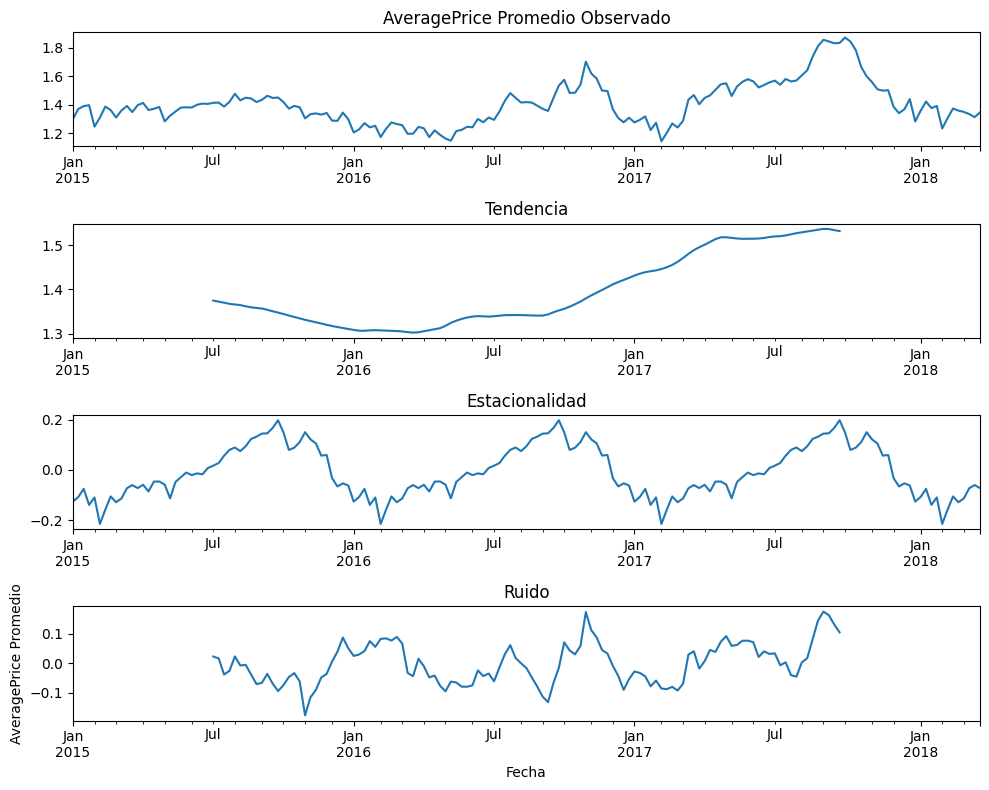

In [7]:
P.P1.P1_1_DescomposicionSerieTemporal(52,'AveragePrice')
#P.P1.P1_1_DescomposicionSerieTemporal(52,'Total Volume')

#P.P1.P1_1_DescomposicionSerieTemporal(4,'AveragePrice')
#P.P1.P1_1_DescomposicionSerieTemporal(4,'Total Volume')


1.2 | **Análisis de Estacionalidad por Región:** 
   
**Análisis de Estacionalidad por Región:** 
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Date` y `Total Volume`.
   - **Esperado:** Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
     - Agrupa los datos por `region` y `Date` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada región.
     - Representa gráficamente las tendencias utilizando `plt.plot()` de `matplotlib`.


1.2 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'>- **Cada línea representa una región específica y permite observar las tendencias estacionales en los precios. 
 - **Por ejemplo, se pueden identificar picos o caídas en precios en ciertas épocas, lo que refleja la oferta y demanda.</span>

<Figure size 2000x600 with 0 Axes>

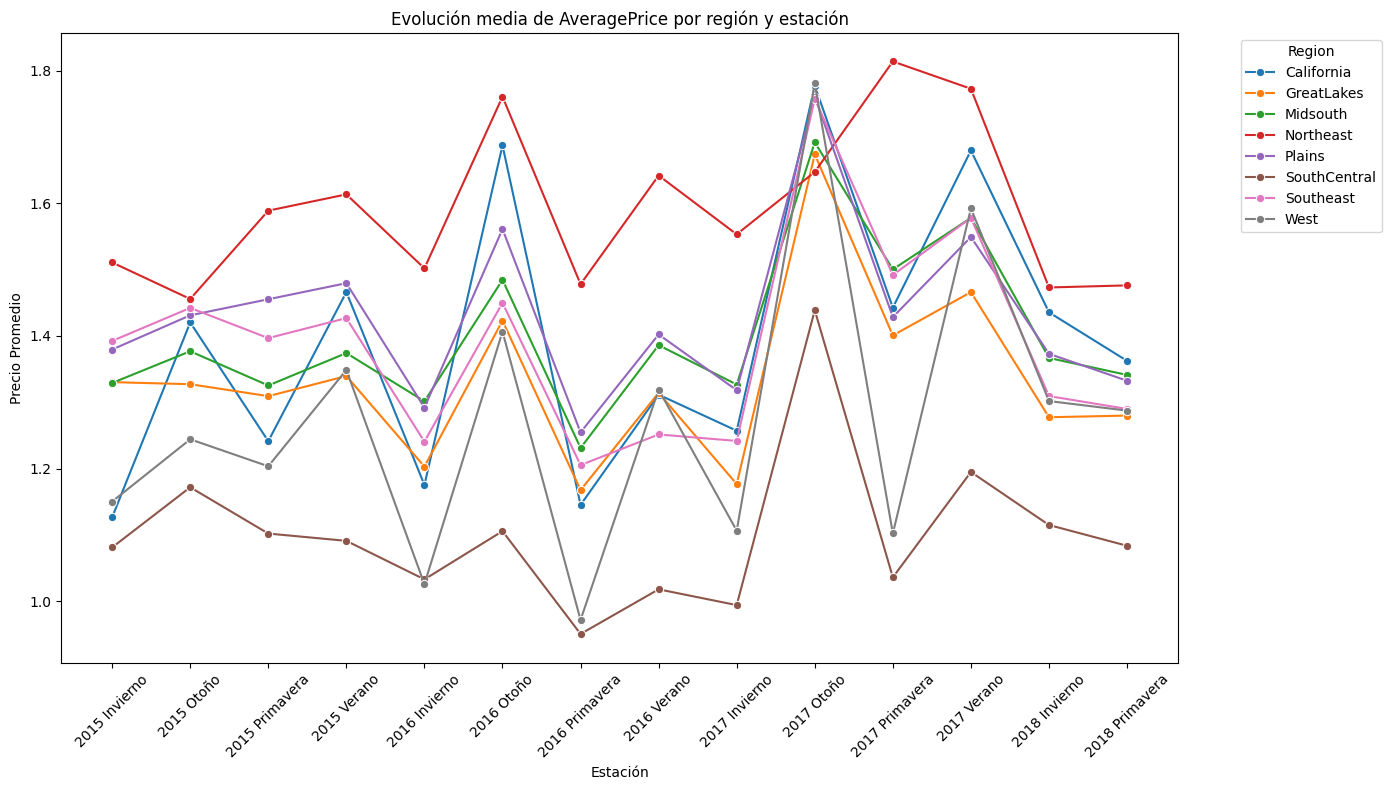

In [8]:
P.P1.Datos = P.DatosORG[(P.DatosORG['CalRegionGrupo'].isin(['GreaterRegion'])) ]
#P.P1.Datos = P.DatosORG[(P.DatosORG['region'].isin(['California'])) ]
P.P1.P1_2_EstacionalidadPorRegion()
P.P1.Datos = P.DatosORG


1.3 | **Comparación de Precios Promedio Mensuales:** 
   
**Uso de Datos:** Usa las columnas `AveragePrice` y `Date`.
   - **Esperado:** Calcula y compara los precios promedio mensuales.
     - Agrupa los datos por mes usando `pd.Grouper` con `freq='M'`.
     - Calcula el promedio de `AveragePrice` para cada mes con `mean()`.
     - Visualiza los resultados con un gráfico de líneas usando `plt.plot()`.


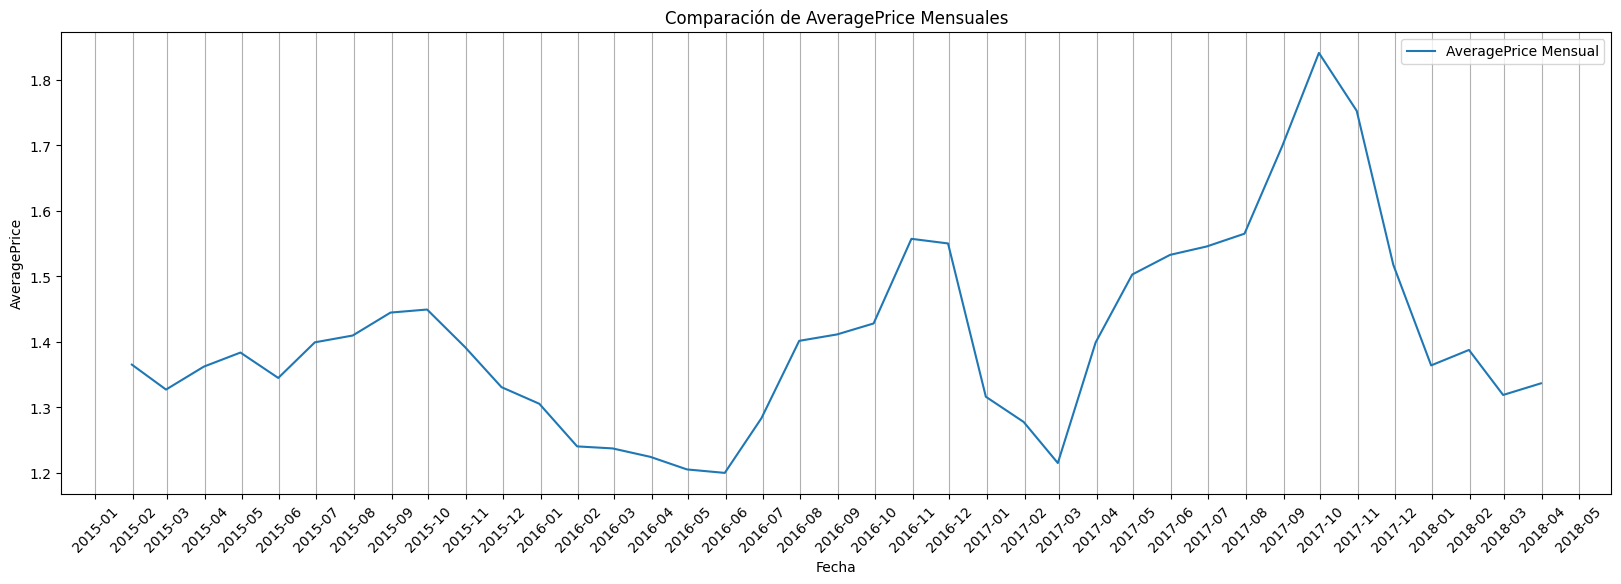

In [9]:
#P.P1.P1_3_ADD_Correlacion(3500000)
P.P1.P1_3_ComparacionPreciosPromedioMensuales()

1.4 | **Tendencia de Ventas a lo Largo del Tiempo:** 
   
- **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.


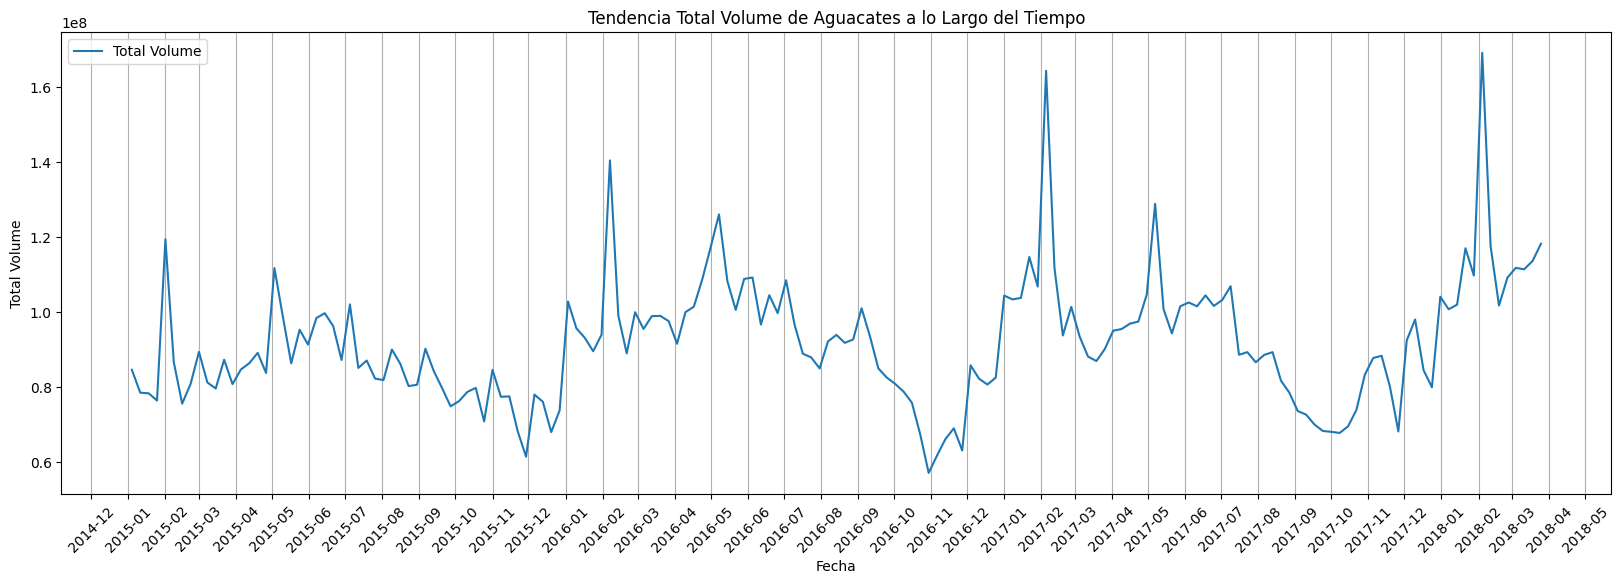

In [10]:
P.P1.Datos = P.DatosORG
#P.P1.Datos = P.DatosORG[(P.DatosORG['region'].isin(['California'])) ]
P.P1.P1_4_TendenciaVentasALoLargoDelTiempo()

1.5 | **Análisis de Cambios en Precios Anuales:** 
   
**Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.


- **parametros**:  
         - *pAnos:*	`[[2015, 2016, 2017]]`
         - *pClasificacion:*	`['']` City,Region,GreaterRegion,TotalUS
    

<Figure size 2000x600 with 0 Axes>

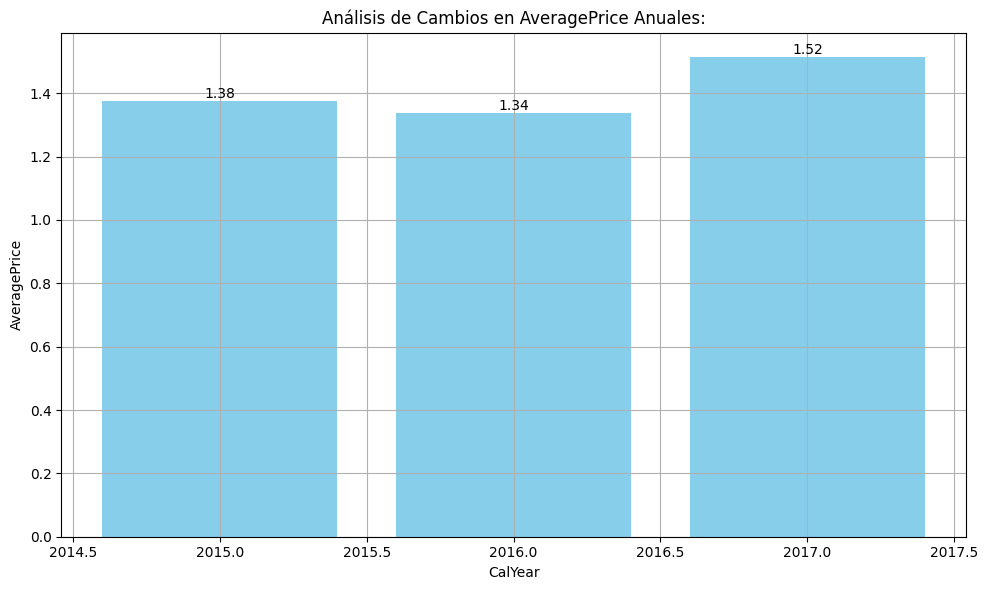

In [11]:
P.P1.Datos = P.DatosORG
#P.P1.P1_5_AnalisisCambiosPreciosAnuales()
P.P1.P1_5_AnalisisCambiosPreciosAnuales([2015, 2016, 2017])
#P.P1.Datos = P.DatosORG[(P.DatosORG['CalMonth'].isin([1,2,3])) ]
#P.P1.P1_5_AnalisisCambiosPreciosAnuales([2015, 2016, 2017,2018])





2.1 | **Gráfico de Violín de Volumen de Ventas por Región:** 
   
- **Uso de Datos:** Usa las columnas `Total Volume` y `region`.
   - **Esperado:** Visualiza la distribución de ventas en diferentes regiones.
     - Utiliza la función `violinplot` de `seaborn` para crear gráficos de violín.
     - Configura los ejes para mostrar la relación entre `Total Volume` y `region`.
     - Añade etiquetas y títulos usando `plt.title()` y `plt.xlabel()` para facilitar la interpretación.


2.1 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'>- Cada violín indica **la densidad de la distribución** del volumen de ventas de cada región.
 - La forma y el ancho del violín a lo largo del eje Y representan cuántas observaciones están dentro de ese rango de Total Volume para la región dada. Un violín más ancho en un área específica significa más datos en ese rango de ventas. 
 - En cada violín puedes ver una línea central que marca la mediana, y a veces otras líneas para los cuartiles, dependiendo de la configuración predeterminada.</span>

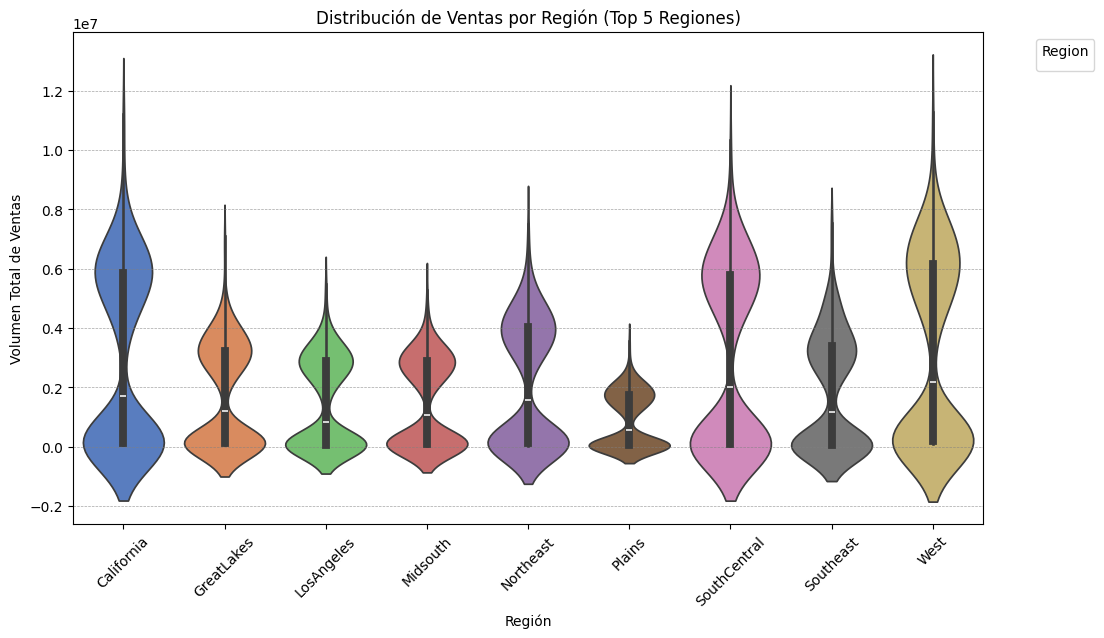

In [12]:
P.PG.P21_Grafico_Violin_Volumen_Venta_Region()

2.2 | **Boxplot Comparativo de Precios entre Años:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Genera boxplots para comparar la distribución de precios.
     - Utiliza `boxplot` de `seaborn` para crear boxplots que comparen `AveragePrice` entre diferentes años.
     - Asegúrate de que cada boxplot represente un año diferente.
     - Incluye etiquetas y títulos descriptivos usando `plt.title()`.


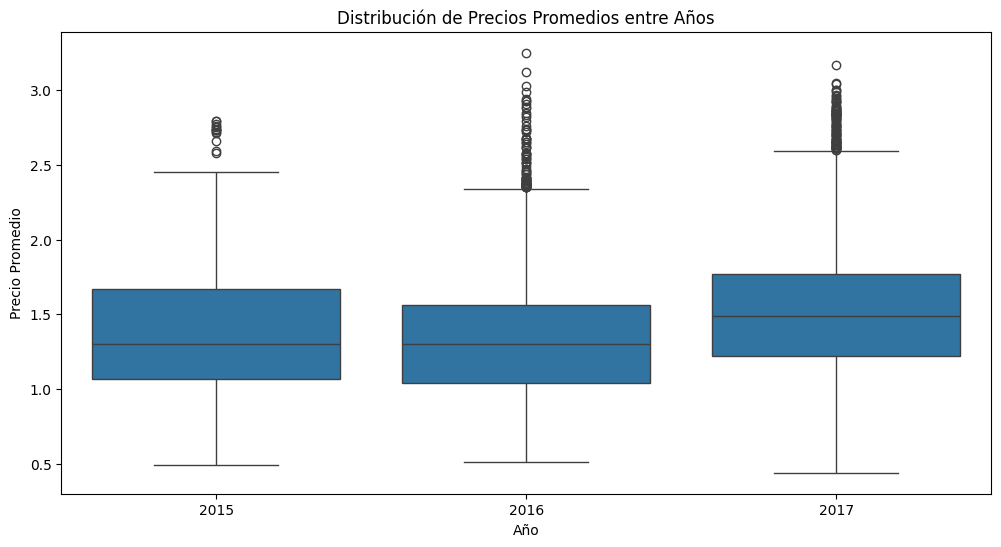

In [13]:
P.P2.Datos = P.DatosORG[(P.DatosORG['CalYear'].isin([2015,2016,2017])) ]
P.P2.P22_Boxplot_Comparativo_Precios_Entre_Años()

2.3 | **Histograma de Volumen Total de Ventas:** 
   
 - **Uso de Datos:** Usa la columna `Total Volume`.
   - **Esperado:** Crea un histograma para mostrar la distribución del volumen total de ventas.
     - Utiliza `hist()` de `matplotlib` para crear el histograma.
     - Ajusta el número de bins para una visualización clara usando el parámetro `bins`.
     - Añade etiquetas y un título que describa lo que se muestra.


- **parametros**:  
         - *pbins:*`30` Numero de intervalos
         - *pLog:*`True` Escala logaritmica True/False
    

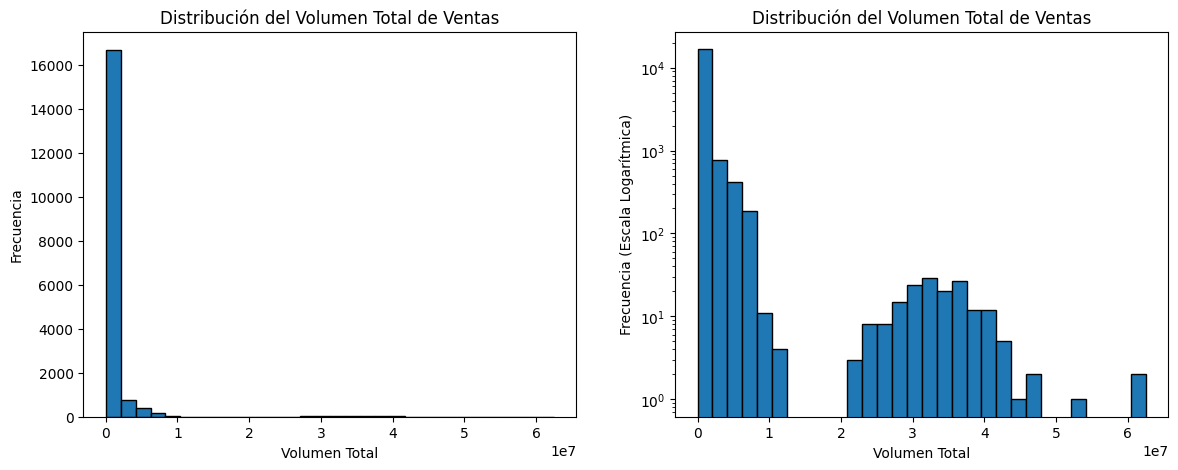

<Figure size 640x480 with 0 Axes>

2.3 | **Histograma de Volumen Total de Ventas:** 
   
 - **Uso de Datos:** Usa la columna `Total Volume`.
   - **Esperado:** Crea un histograma para mostrar la distribución del volumen total de ventas.
     - Utiliza `hist()` de `matplotlib` para crear el histograma.
     - Ajusta el número de bins para una visualización clara usando el parámetro `bins`.
     - Añade etiquetas y un título que describa lo que se muestra.


- **parametros**:  
         - *pbins:*`30` Numero de intervalos
         - *pLog:*`True` Escala logaritmica True/False
    

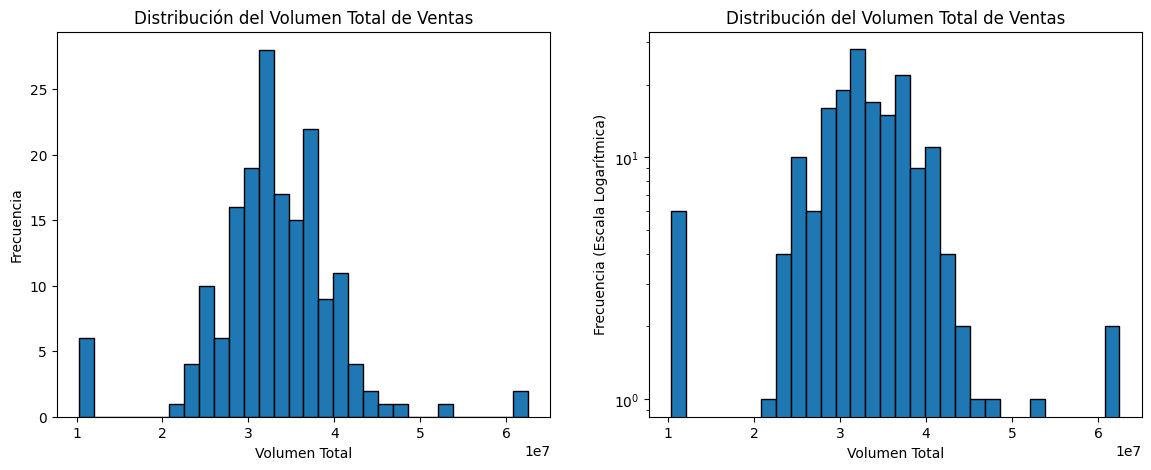

<Figure size 640x480 with 0 Axes>

In [14]:
from IPython.display import display, HTML
P.P2.Datos = P.DatosORG
P.P2.P23_Histograma_Volumen_Total_Ventas(30,True)
display(HTML("<span style='font-size:20px; color:blue; font-style:italic;'>Filtrado Total Volume > 10.000.000 </span>"))
P.P2.Datos = P.DatosORG[(P.DatosORG['Total Volume'] > 10000000) ]
P.P2.P23_Histograma_Volumen_Total_Ventas(30,True)

2.4 | **Gráfico de Barras de Ventas por Tipo de Bolsa:** 
   
- **Uso de Datos:** Utiliza las columnas `Total Bags`, `Small Bags`, `Large Bags` y `XLarge Bags`.
   - **Esperado:** Compara las ventas de diferentes tipos de bolsas.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `sum()`.
     - Crea un gráfico de barras con `plt.bar()` para mostrar las diferencias en ventas.
     - Asegúrate de incluir etiquetas para cada tipo de bolsa.


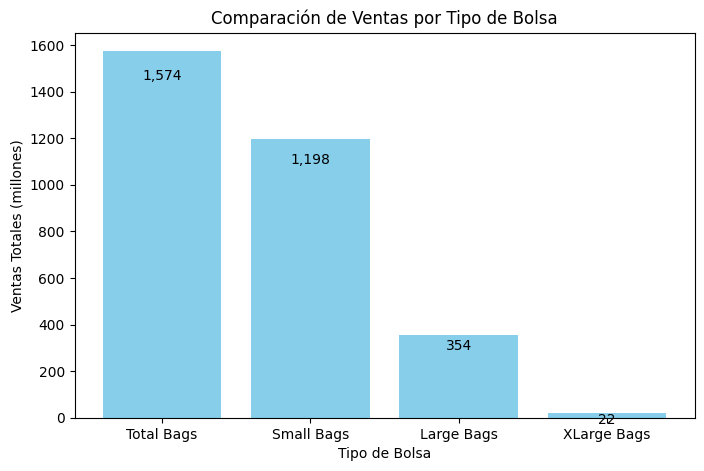

In [15]:
P.P2.P24_Grafico_Barras_Ventas_Tipo_Bolsa()

2.5 | **Gráfico de Líneas de Precios Promedios por Año:** 
   
- **Uso de Datos:** Utiliza las columnas `AveragePrice` y `year`.
   - **Esperado:** Visualiza la tendencia de precios promedio a lo largo de los años.
     - Agrupa los datos por `year` y calcula el promedio de `AveragePrice`.
     - Usa `plt.plot()` para crear un gráfico de líneas que muestre la evolución de precios.
     - Añade un título y etiquetas descriptivas a los ejes usando `plt.title()` y `plt.xlabel()`.


- **parametros**:  
         - *pAnos:*	`[[2015, 2016, 2017]]`
    

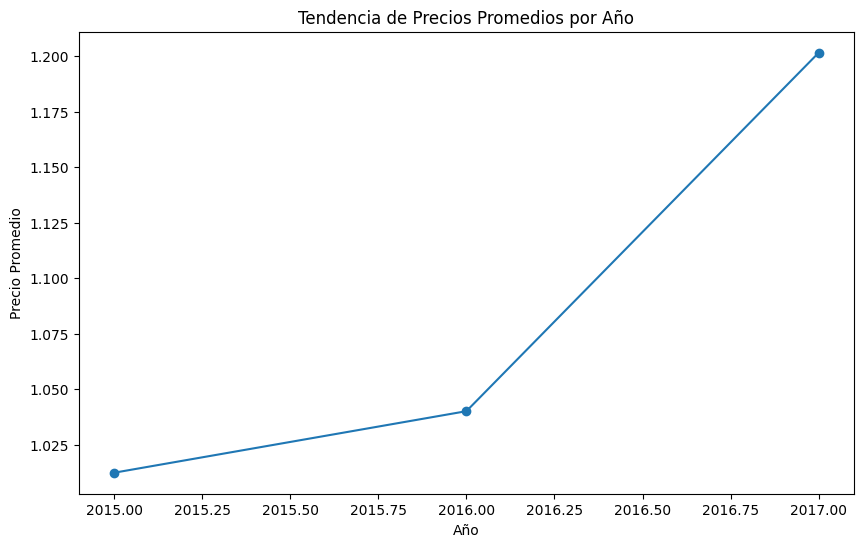

In [16]:
P.P2.P25_Grafico_Lineas_Precios_Promedios_Año([2015, 2016, 2017])

Fintrado años [2015, 2016,2017]


3.1 | **Elasticidad Precio-Demanda por Año:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda para cada año.
     - Calcula la variación porcentual de `Total Volume` y `AveragePrice` utilizando `pd.pct_change()`.
     - Utiliza la fórmula de elasticidad para determinar la sensibilidad de la demanda respecto al precio.
     - Presenta los resultados en un gráfico de líneas usando `plt.plot()` para mostrar la elasticidad por año.



- **parametros**:  
     - **pListaRegiones:** ``

    

Tabla Elasticidad periodo
   Cambio_Volumen  Cambio_Precio  Elasticidad
0             NaN            NaN          NaN
1        0.099287      -0.026862    -3.696231
2        0.023526       0.131841     0.178441


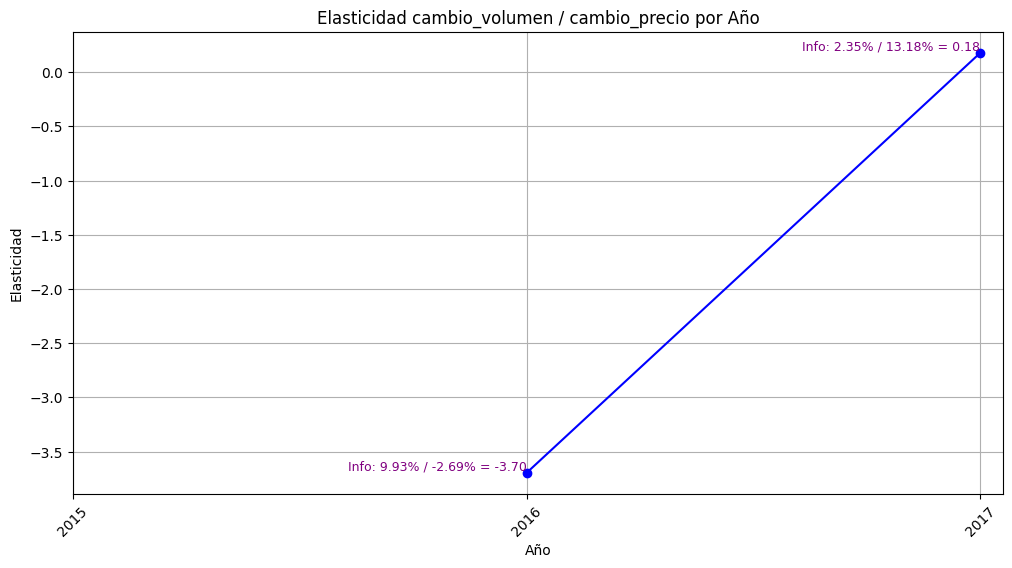

In [17]:
#P.P3.Datos = P.DatosORG
P.P3.Datos = P.DatosORG[P.DatosORG['CalYear'].isin([ 2015,2016,2017])] 
print('Fintrado años [2015, 2016,2017]')
P.P3.P3_1_Elasticidad_Precio_Demanda_Año('')
# Los valores positivos indican una alta elasticidad la demanda sube cuando sube el precio cada 1% que aumenta el precio la venta sube un 6%
# mientras que en el 2016 indica todo lo contrario la demanda sube cuando baja el precio, cada 1% que aumenta el precio la venta baja un 4%

3.2 | **Comparación de Elasticidad en Diferentes Mercados:** 
   
- **Uso de Datos:** Utiliza las columnas `Total Volume` y `AveragePrice`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda en diferentes regiones.
     - Agrupa los datos por `region` y calcula la elasticidad para cada región utilizando `pd.pct_change()`.
     - Presenta un gráfico de barras que muestre la elasticidad por región usando `plt.bar()`.


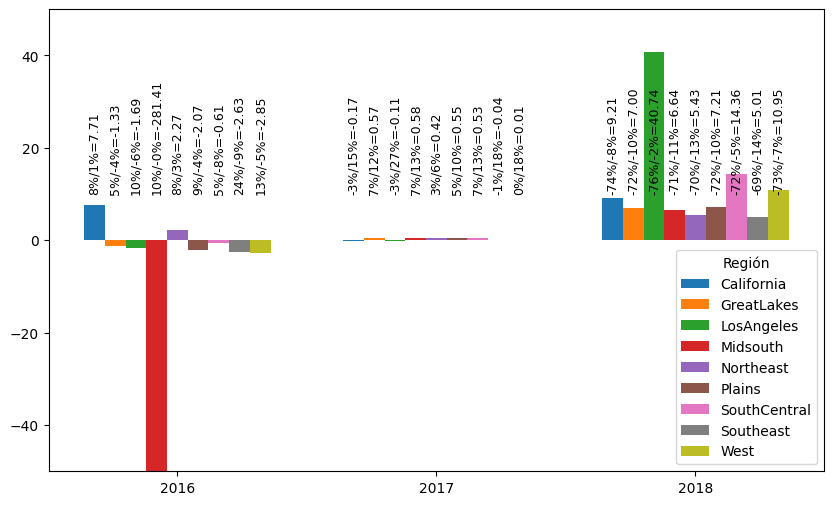

In [18]:
P.PG.P3_2_Elasticidad_Regiones()


3.3 | **Elasticidad a Nivel de Tipo de Bolsa:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Bags`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda específica para cada tipo de bolsa.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `groupby()` y `sum()`.
     - Calcula la elasticidad para cada tipo y presenta los resultados en un gráfico comparativo usando `plt.bar()`.


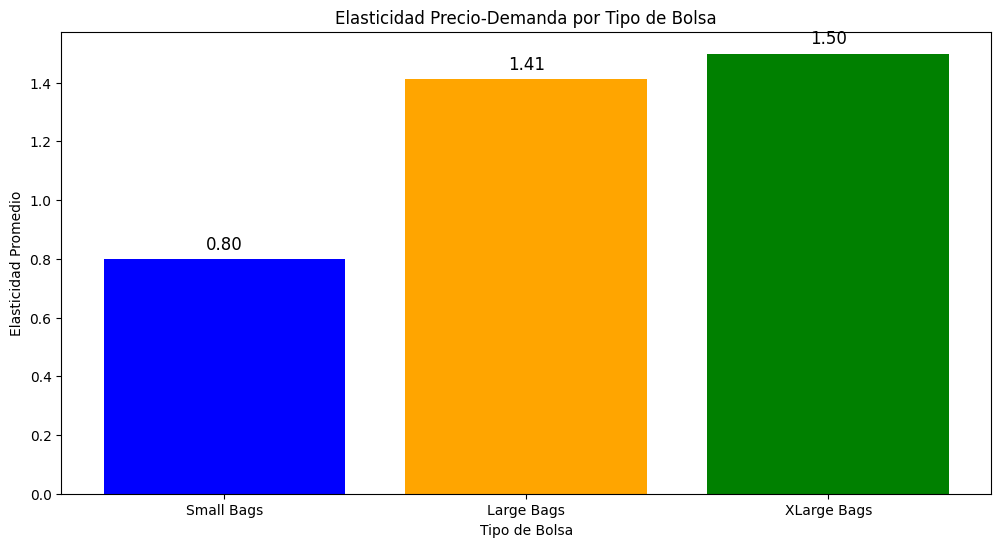

CalYear,AveragePrice,Small Bags,Large Bags,XLarge Bags
2016,1.338640,1.106494e+09,3.366263e+08,20038284.84
2017,1.515128,1.222953e+09,3.993390e+08,23997172.34
0,0.000000,,,
1,0.798307,,,


In [19]:
P.P3.Datos = P.DatosORG
#print(len(P.DatosORG))
P.P3.Datos = P.DatosORG[(P.DatosORG['CalYear'].isin([2016,2017])) ]
P.P3.P3_3_Elasticidad_BolsasB()

vMsg="""
<b>NOTAS:</b>
- <span style="color:blue;">Se eliminan los años 2015 y 2018, al no estar completos darían cifras incorrectas.</span>
- <span style="color:blue;">Esto da como resultado 2 registros: 2016 y 2017. Eliminamos el registro 2016 ya que es 0, y la media sería errónea.</span>
- <span style="color:blue;">Calculando Elasticidad media de los 3 años, para Cada Tipo de Bolsa...</span>

<table>
<tr><th>CalYear</th><th>AveragePrice</th><th>Small Bags</th><th>Large Bags</th><th>XLarge Bags</th></tr>
<tr><td>2016</td><td>1.338640</td><td>1.106494e+09</td><td>3.366263e+08</td><td>20038284.84</td></tr>
<tr><td>2017</td><td>1.515128</td><td>1.222953e+09</td><td>3.993390e+08</td><td>23997172.34</td></tr>
<tr><td>0</td><td>0.000000</td><td></td><td></td><td></td></tr>
<tr><td>1</td><td>0.798307</td><td></td><td></td><td></td></tr>
</table>

<b># Calcular la elasticidad promedio</b>
<pre>
elasticidades_promedio = [
    Datos_bolsas['Elasticidad_Small'].mean(),
    Datos_bolsas['Elasticidad_Large'].mean(),
    Datos_bolsas['Elasticidad_XLarge'].mean()
]
</pre>

- <span style="color:blue;">El gráfico muestra la media del resto de los años; en este caso, solo un registro.</span>
"""
from IPython.display import display, HTML
P.P2.Datos = P.DatosORG
display(HTML(vMsg))


3.4 | **Análisis de Elasticidad Comparativa entre Orgánicos y Convencionales:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `type`.
   - **Esperado:** Compara la elasticidad de la demanda entre aguacates orgánicos y convencionales.
     - Agrupa los datos por `type` y calcula la elasticidad utilizando `pd.pct_change()`.
     - Presenta un gráfico que muestre la diferencia en elasticidad entre los dos tipos usando `plt.bar()`.


3.4 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'></span>

<Figure size 1000x600 with 0 Axes>

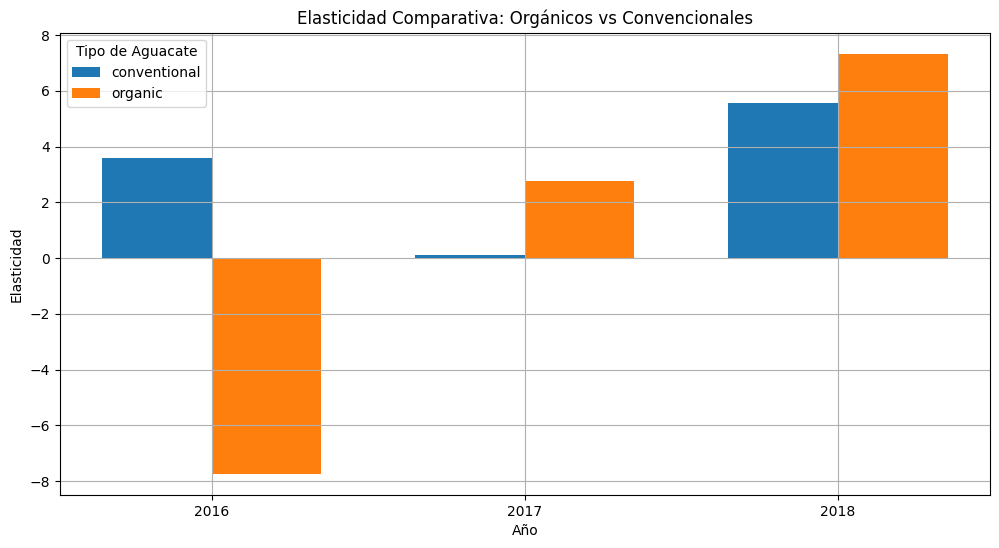

In [20]:
P.P3.Datos = P.DatosORG
#print(len(P.DatosORG))
P.P3.Datos = P.DatosORG[(P.DatosORG['CalYear'].isin([2015,2016,2017,2018])) ]
P.P3.P3_4_Elasticidad_Tipo()

3.5 | **Análisis de la Elasticidad Precios-Ventas:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Examina cómo las variaciones en `AveragePrice` afectan a `Total Volume`.
     - Realiza un análisis de la relación entre estas dos variables calculando la elasticidad.
     - Presenta un gráfico de dispersión que muestre la relación y discute la tendencia observada utilizando `plt.scatter()` y `plt.plot()`.


3.5 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'> Refleja un valor constante de 1.0 para todos los años. Esto sugiere que la **elasticidad es uniforme** en todos los años y está fijada en 1.0, lo que implica que el cambio porcentual en el volumen de ventas es exactamente proporcional al cambio porcentual en el precio promedio (es decir, un cambio del 1% en el precio se refleja en un cambio del 1% en el volumen de ventas).</span>

Analizando Elasticidad entre Precios y Ventas Totales...


/home/jbentezag/.local/lib/python3.8/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


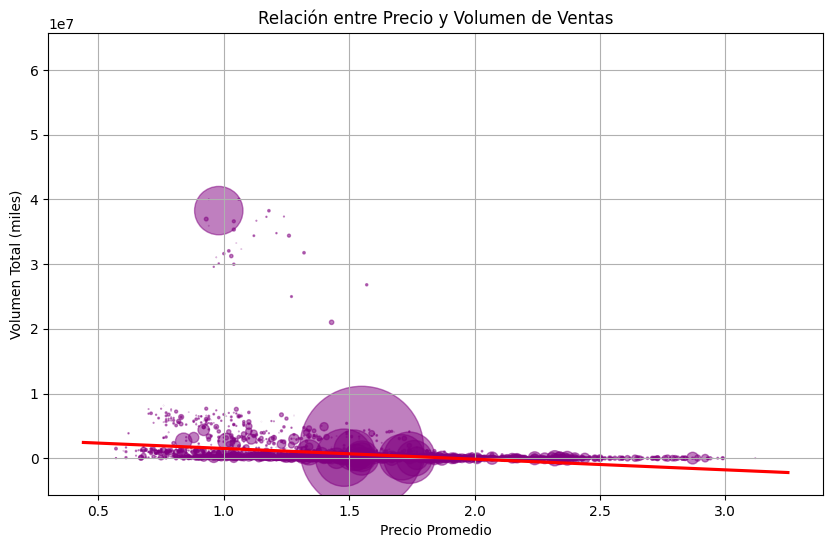

3.5 | **Análisis de la Elasticidad Precios-Ventas:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Examina cómo las variaciones en `AveragePrice` afectan a `Total Volume`.
     - Realiza un análisis de la relación entre estas dos variables calculando la elasticidad.
     - Presenta un gráfico de dispersión que muestre la relación y discute la tendencia observada utilizando `plt.scatter()` y `plt.plot()`.


3.5 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'> Refleja un valor constante de 1.0 para todos los años. Esto sugiere que la **elasticidad es uniforme** en todos los años y está fijada en 1.0, lo que implica que el cambio porcentual en el volumen de ventas es exactamente proporcional al cambio porcentual en el precio promedio (es decir, un cambio del 1% en el precio se refleja en un cambio del 1% en el volumen de ventas).</span>

Analizando Elasticidad entre Precios y Ventas Totales...


/home/jbentezag/.local/lib/python3.8/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


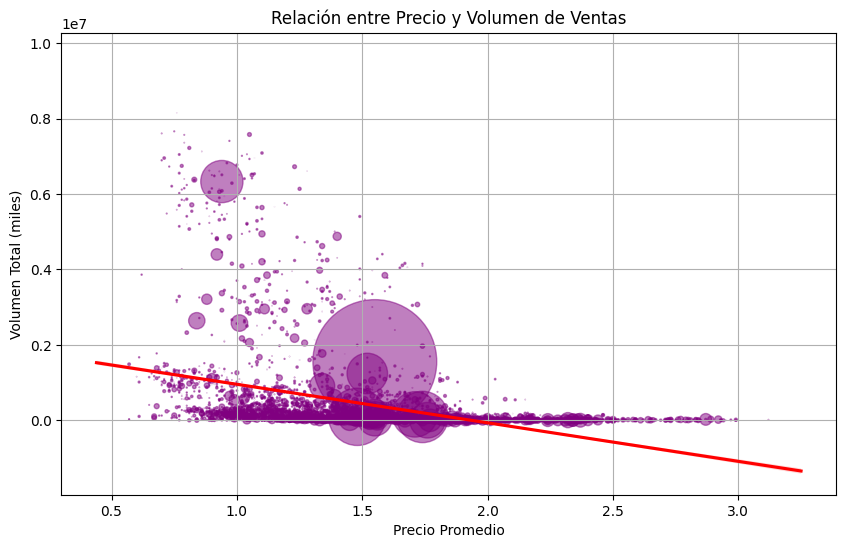

In [21]:
P.P3.Datos= P.DatosORG
P.P3.P3_5_Elasticidad_Precio_Ventas()
P.P3.Datos = P.DatosORG[(P.DatosORG['Total Volume'] < 10000000) ]
P.P3.P3_5_Elasticidad_Precio_Ventas()

In [22]:
from IPython.display import display, HTML
display(HTML("<span style='font-size:20px; color:red; font-style:italic;'>ERRONEO no se han definido Cohortes</span>"))
display(HTML("<span style='font-size:20px; color:red; font-style:italic;'></span>"))
P.P4.P4_1_CohortesPreciosPromedios()


4.1 | **Cohortes Basadas en Precios Promedios Trimestrales:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `Date`.
   - **Esperado:** Crea cohortes trimestrales y analiza cambios en precios y volúmenes.
     - Agrupa los datos por trimestre usando `pd.Grouper` con `freq='Q'`.
     - Calcula el promedio de `AveragePrice` y suma `Total Volume` para cada cohorte.
     - Visualiza los resultados en un gráfico de líneas que muestre la evolución de las cohortes.


4.1 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'></span>

ValueError: Invalid frequency: QE

In [ ]:
P.P4.P4_2_CohortesRegionFechaB(['Albany','Boise'],2015)

In [ ]:
from IPython.display import display, HTML
display(HTML("<span style='font-size:20px; color:red; font-style:italic;'>ERRONEO el tipo de Bolsa no es el Cohorte a analizar, sino la región</span>"))

P.P4.P4_3_CohortesTipoBolsa(['Small Bags','Large Bags','XLarge Bags'],'','NO')
P.P4.P4_3_CohortesTipoBolsa(['Small Bags','Large Bags','XLarge Bags'],'log','NO')
#['Total Bags','Small Bags','Large Bags','XLarge Bags']
P.P4.P4_3_CohortesTipoBolsa(['Small Bags','Large Bags','XLarge Bags'],'','SI')
P.P4.P4_3_CohortesTipoBolsa(['Small Bags','Large Bags','XLarge Bags'],'log','SI')
#P.P4.P4_3_CohortesTipoBolsa(['XLarge Bags'],'','SI')

In [ ]:
P.P4.P4_3_CohortesTipoBolsaB(['Small Bags', 'Large Bags', 'XLarge Bags'],'SI')

In [ ]:
P.P4.P4_4_CohortesClientesVentas()

In [ ]:
P.P4.P4_5_RetencionVentasCohorte()

In [ ]:
#P.P5.P5_1_MatrizCorrelacion(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags','Large Bags','XLarge Bags','year'])
P.P5.P5_1_MatrizCorrelacion(['AveragePrice', 'Total Volume', 'Total Bags','Small Bags','Large Bags','XLarge Bags','CalRegion_Total_Volume','CalRegion_Porcentaje'])

In [ ]:
P.P5.P5_2_AnalisisDispersión()
P.P5.P5_2_AnalisisDispersiónN()
#P.P5.Datos = P.DatosORG[(P.DatosORG['Total Volume'] < 10000000) ]
#P.P5.P5_2_AnalisisDispersión()
#P.P5.P5_2_AnalisisDispersiónN()


In [ ]:
from IPython.display import display, HTML
P.P5.P5_3_PrediccionesMensuales()
#P.P5.Datos = P.DatosORG[(P.DatosORG['CalYear'].isin([2015])) ]
#P.P5.P5_3_PrediccionesMensuales()


In [ ]:
P.P5.P5_4_PrediccionesTrimestrales()

In [ ]:
#P.P5.P5_5_PrediccionesAnuales(1)
P.P5.P5_5_PrediccionesAnuales(2)
mDes="""
## Análisis de Predicción y Precisión de Datos

### 1. Total Volume

#### Análisis con el año anterior:
- **Predicción Lineal:** 915,241.06
- **Predicción Polinómica:** 792,783.69
- **R² Lineal:** 0.468 (aproximadamente)
- **R² Polinómica:** -0.673 (aproximadamente)
- **RMSE Lineal:** 77,312.02
- **RMSE Polinómica:** 137,072.02

#### Análisis con dos años anteriores:
- **Predicción Lineal:** 1,013,206.96
- **Predicción Polinómica:** 1,245,386.56
- **R² Lineal:** 0.816 (aproximadamente)
- **R² Polinómica:** -0.216 (aproximadamente)
- **RMSE Lineal:** 45,509.37
- **RMSE Polinómica:** 116,842.41

### Interpretación para Total Volume:
- **Precisión y ajuste del modelo:** 
  - Con un año de datos anteriores, el modelo lineal tiene un **R² de 0.468**, lo que sugiere un ajuste moderado, mientras que el modelo polinómico presenta un **R² negativo (-0.673)**, indicando que el modelo polinómico no es adecuado para estos datos.
  - Con dos años de datos, el modelo lineal tiene un **R² de 0.816**, lo que indica un buen ajuste, mientras que el modelo polinómico sigue mostrando un **R² negativo (-0.216)**, lo que sugiere que este modelo es ineficaz.
  
- **Error medio cuadrático (RMSE):** 
  - El **RMSE** del modelo lineal con un año de datos es de 77,312.02, que es relativamente alto, lo que sugiere que las predicciones pueden tener un margen significativo de error.
  - Con dos años de datos, el **RMSE** disminuye a 45,509.37, lo que indica una mejora en la precisión de las predicciones.

### 2. Average Price

#### Análisis con el año anterior:
- **Predicción Lineal:** 1.5493
- **Predicción Polinómica:** 1.9051
- **R² Lineal:** -1.388 (aproximadamente)
- **R² Polinómica:** -14.361 (aproximadamente)
- **RMSE Lineal:** 0.1099
- **RMSE Polinómica:** 0.2788

#### Análisis con dos años anteriores:
- **Predicción Lineal:** 1.2647
- **Predicción Polinómica:** 1.1539
- **R² Lineal:** -1.590 (aproximadamente)
- **R² Polinómica:** -3.951 (aproximadamente)
- **RMSE Lineal:** 0.1145
- **RMSE Polinómica:** 0.1583

### Interpretación para Average Price:
- **Precisión y ajuste del modelo:** 
  - Ambos modelos (lineal y polinómico) presentan **R² negativos** en ambos casos, lo que indica que ninguno de los modelos se ajusta adecuadamente a los datos. Esto significa que las predicciones son muy poco fiables y que los modelos no están explicando la variación observada en los precios.
  
- **Error medio cuadrático (RMSE):** 
  - El **RMSE** es relativamente bajo para ambos modelos, lo que sugiere que, a pesar de la falta de ajuste, las predicciones no se desvían enormemente de los valores observados. Sin embargo, esto no debe considerarse una buena señal, ya que un modelo efectivo debería mostrar **R² positivos** junto con un **RMSE bajo**.

### Conclusiones Generales:
- Para **Total Volume**, el modelo lineal es más efectivo que el polinómico, especialmente cuando se utilizan dos años de datos anteriores, lo que mejora la precisión de las predicciones. Sin embargo, el **RMSE** aún sugiere que hay un margen de error considerable.
- Para **Average Price**, ambos modelos fallan en proporcionar un ajuste adecuado (R² negativos), lo que indica que otros factores pueden estar influyendo en el precio que no están siendo capturados por estos modelos.
- En general, podría ser beneficioso considerar otros enfoques de modelado o la inclusión de variables adicionales que puedan mejorar el ajuste de los modelos y, por ende, la calidad de las predicciones.
"""
from IPython.display import display, Markdown, HTML
display(Markdown(mDes))


In [ ]:
P.P5.P5_6_Modelos_Regresión_Múltiple()

In [ ]:
P.P5.P5_7_CoefficientsRegresionMultiple()

In [ ]:
P.P5.P5_8_VolumenVentas()
P.P5.P5_8_Regresion_VolumenVentas()

In [ ]:
P.P5.P5_9_AnalisisInfluenciaVentas()

In [ ]:
P.P5.P5_10_RegresionPrecioPromedioPorTipo()